In [10]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
np.random.seed(42)

In [11]:
dev = qml.device('default.qubit',wires = 3)

@qml.qnode(dev, diff_method= 'parameter-shift')
def circuit(parameters):
    qml.RX(parameters[0], wires = 0)
    qml.RY(parameters[1], wires = 1)
    qml.RZ(parameters[2], wires= 2)
    qml.broadcast(qml.CNOT, wires = [0,1,2], pattern = 'ring')
    qml.RX(parameters[3], wires = 0)
    qml.RY(parameters[4], wires = 1)
    qml.RZ(parameters[5], wires= 2)
    qml.broadcast(qml.CNOT, wires = [0,1,2], pattern = 'ring')
    return qml.expval(qml.PauliY(0) @ qml.PauliZ(2))



In [12]:
parameters = np.random.random([6],requires_grad = True)
print(f"The parameters are: {parameters}")
print(f' The expectations values are : {circuit(parameters=parameters)}')

The parameters are: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 The expectations values are : -0.11971365706871567


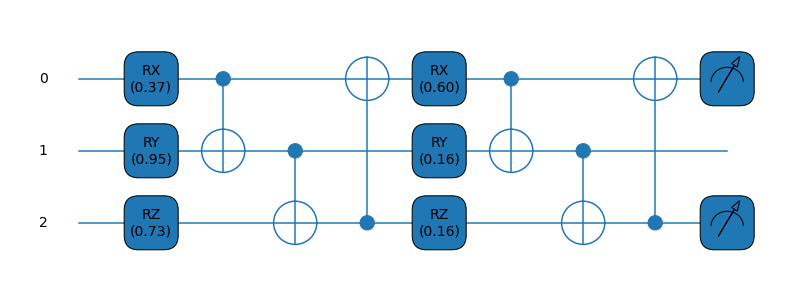

In [13]:
fig,ax = qml.draw_mpl(circuit,decimals=2)(parameters)
plt.show()